## Chargement des bibliothèques

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Chargement donnée

In [64]:
resumeDataSet = pd.read_csv('Resume_DataSet.csv' ,encoding='utf-8')

## les dimentions de notre jeu de données 

In [65]:
resumeDataSet.shape

(962, 2)

## l'affichage des premiers lignes de notre data

In [66]:
resumeDataSet.head(7)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...


## Voyons quelles sont les différentes catégories que nous avons dans les données.

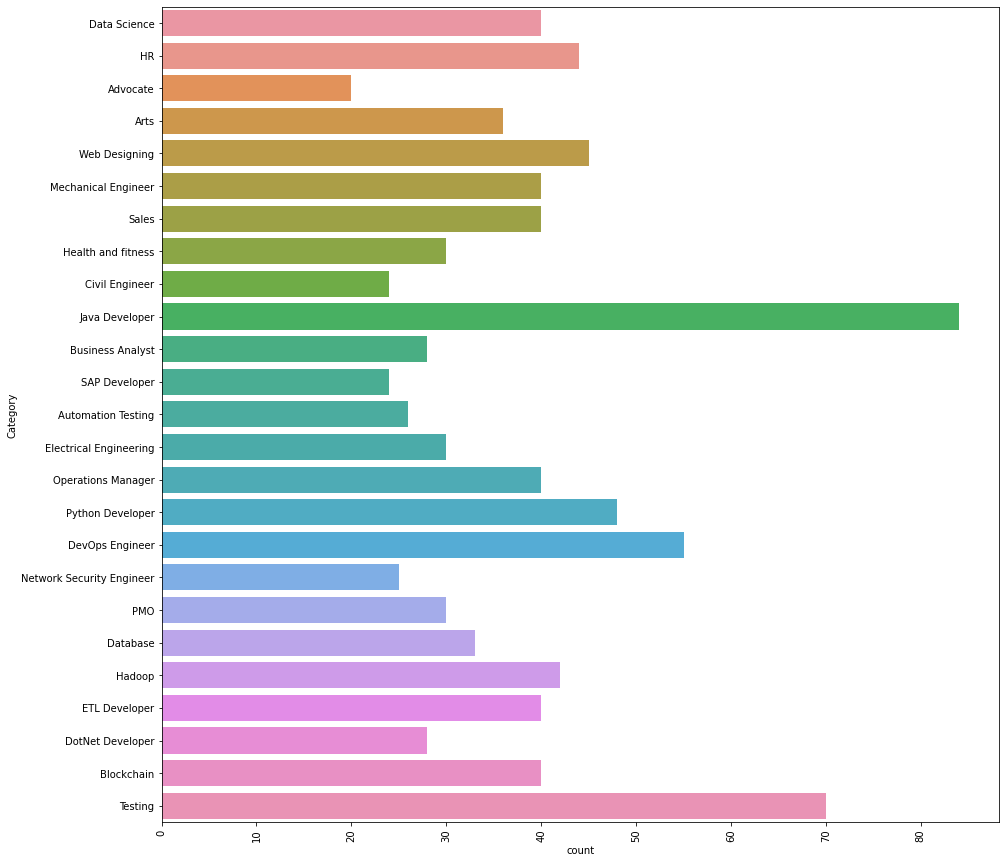

In [67]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y='Category', data=resumeDataSet)
plt.savefig('jobcategory_details.png')


In [69]:
#Il y a 25 catégories différentes que nous avons dans les données. Les 3 principales catégories d'emplois que nous avons
#dans les données sont les suivantes.   [Java developer, Testing, and DevOps Engineer]

## Au lieu du nombre ou de la fréquence, nous pouvons également visualiser la répartition des catégories d'emploi en pourcentage comme ci-dessous :

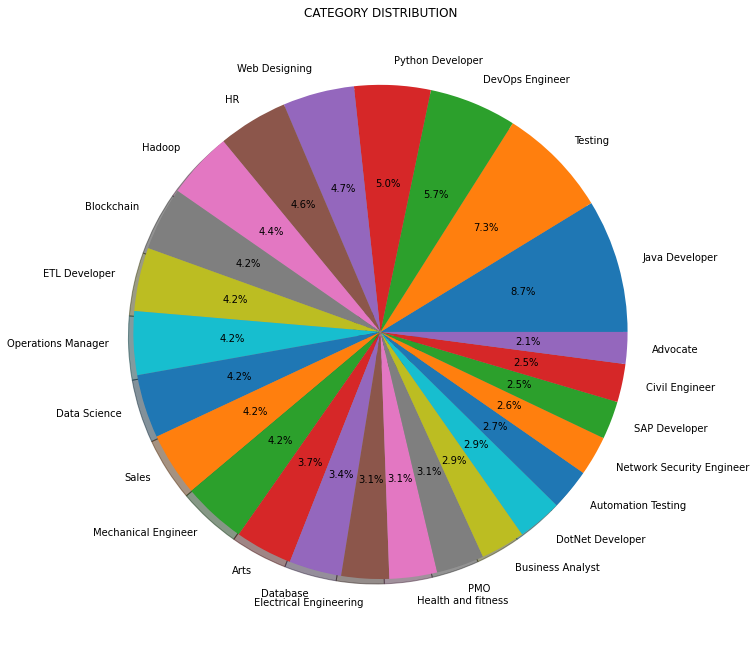

In [68]:
targetCounts = resumeDataSet['Category'].value_counts().reset_index()['Category']
targetLabels  = resumeDataSet['Category'].value_counts().reset_index()['index']
# Faire des figures carrées et des axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, )
plt.savefig('category_dist.png')

# Traitement des données

### Étape 1 : Nettoyez la colonne "Resume"

In [13]:
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)  # supprimer URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # supprimer RT et cc
    resumeText = re.sub('#S+', '', resumeText)  # supprimer hashtags
    resumeText = re.sub('@S+', '  ', resumeText)  # supprimer mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # supprimer les ponctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText) 
    resumeText = re.sub('s+', ' ', resumeText)  # supprimer les espaces
    return resumeText
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

### l'affichage des 7 nouveaux premiers lignes de notre data

In [14]:
resumeDataSet.head(7)

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skill Programming Language P thon panda ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Detail Ma 2013 to Ma 2017 B E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Area of Intere t Deep Learning Control S te...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skill R P thon SAP HANA Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Detail MCA YMCAUST Faridabad...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",SKILLS C Ba ic IOT P thon MATLAB Data Sci...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,Skill P thon Tableau Data Vi uali...


### Étape 2 : Encodage de la « Category »

In [70]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

### Étape 3 : Prétraitement de la colonne « cleaned_resume »

In [19]:
requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [20]:
resumeDataSet.head(7)

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skill Programming Language P thon panda ...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Detail Ma 2013 to Ma 2017 B E ...
2,6,"Areas of Interest Deep Learning, Control Syste...",Area of Intere t Deep Learning Control S te...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skill R P thon SAP HANA Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Detail MCA YMCAUST Faridabad...
5,6,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",SKILLS C Ba ic IOT P thon MATLAB Data Sci...
6,6,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,Skill P thon Tableau Data Vi uali...


# Création notre Model

### Création les variables des training et test set.

In [24]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


### construire le modèle

In [72]:
clf = OneVsRestClassifier(KNeighborsClassifier())

### Entrainer le modéle

In [26]:
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

## Prediction le modéle

In [27]:
prediction = clf.predict(X_test)

# Evaluer le modéle

In [28]:
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))


Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99


### Nous pouvons également consulter le rapport de classement détaillé pour chaque classe ou catégorie.

In [46]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00         3
          17       1.00    

### Où, 0, 1, 2…. sont les catégories d'emploi. Nous obtenons les étiquettes réelles de l'encodeur d'étiquettes que nous avons utilisé.

In [71]:
le.classes_

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)